In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [54]:

df = pd.read_excel("./Data/all_schedules.xlsx")


df['team'] = df['team'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)

#ignore comments in this cell

# create new column with sorted team names
#df['matchup'] = df.apply(lambda row: '-'.join(sorted([row['team'], row['Opponent']])), axis=1)

# create unique identifier for each matchup
#df['matchup_id'] = df['New Date'].astype(str) + '-' + df['team']

# drop duplicate rows based on matchup_id
#df = df.drop_duplicates(subset='matchup_id')

# drop matchup and matchup_id columns
#df = df.drop(columns=['matchup', 'matchup_id']) #filter out games that are repeated on the same day... do we need to do this?


df

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,35,"Sun,",2023-03-19,CBI,N,Eastern Kentucky,A-Sun,-2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Cleveland St.,cleveland-state,0,2023
57805,31,"Sun,",2023-03-19,CBI,N,Milwaukee,Horizon,-4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Stetson,stetson,0,2023
57806,34,"Sun,",2023-03-19,CBI,N,Tarleton State,WAC,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Radford,radford,0,2023
57807,34,"Sun,",2023-03-19,CBI,N,Duquesne,A-10,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Rice,rice,0,2023


In [55]:
df.head()

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016


In [56]:
team_stats = pd.read_excel("./Data/all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [57]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])
merged


,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [58]:
training_set = merged
training_set

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


In [59]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['Opponent'])

training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA
training_set.head()

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
193,5,"Thu,",2015-11-26,REG,N,Santa Clara,WCC,-4.67,W,75.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Arizona
204,16,"Sat,",2016-01-09,REG,A,Southern California,Pac-12,13.52,L,101.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Southern California
221,33,"Fri,",2016-03-11,CTOURN,N,Oregon,Pac-12,18.05,L,89.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Oregon
435,21,"Thu,",2016-01-21,REG,H,Southern Illinois-Edwardsville,OVC,-10.78,W,90.0,...,31.3,51.0,53.3,34.7,36.4,70.5,-11.3,R64,16.0,Austin Peay
436,22,"Sat,",2016-01-23,REG,H,Eastern Illinois,OVC,-8.35,L,86.0,...,31.3,51.0,53.3,34.7,36.4,70.5,-11.3,R64,16.0,Eastern Illinois


SELECT FEATURES FOR TRAINING SET HERE

In [60]:
training_set = training_set[['team', 'Opponent', "Winner", "W/L", "SRS", 'Site',"BARTHAG" ,"2P_O", "3P_O" ,"Year", "Type"]]
print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)

training_set.head()

489


,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,Arizona,Santa Clara,Arizona,W,-4.67,N,0.9022,52.2,38.1,2016,REG
1,Arizona,Southern California,Southern California,L,13.52,A,0.9022,52.2,38.1,2016,REG
2,Arizona,Oregon,Oregon,L,18.05,N,0.9022,52.2,38.1,2016,CTOURN
3,Austin Peay,Southern Illinois-Edwardsville,Austin Peay,W,-10.78,H,0.3501,51.0,34.7,2016,REG
4,Austin Peay,Eastern Illinois,Eastern Illinois,L,-8.35,H,0.3501,51.0,34.7,2016,REG


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["Opponent"]=encoder.fit_transform(training_set["Opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away



converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,1,183,Arizona,W,-4.67,2,0.9022,52.2,38.1,2016,REG
1,1,191,Southern California,L,13.52,0,0.9022,52.2,38.1,2016,REG
2,1,155,Oregon,L,18.05,2,0.9022,52.2,38.1,2016,CTOURN
3,6,192,Austin Peay,W,-10.78,1,0.3501,51.0,34.7,2016,REG
4,6,54,Eastern Illinois,L,-8.35,1,0.3501,51.0,34.7,2016,REG


In [62]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,1,183,1,W,-4.67,2,0.9022,52.2,38.1,2016,REG
1,1,191,191,L,13.52,0,0.9022,52.2,38.1,2016,REG
2,1,155,155,L,18.05,2,0.9022,52.2,38.1,2016,CTOURN
3,6,192,6,W,-10.78,1,0.3501,51.0,34.7,2016,REG
4,6,54,54,L,-8.35,1,0.3501,51.0,34.7,2016,REG


In [63]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,1,183,1,-4.67,2,0.9022,52.2,38.1,2016,REG
1,1,191,191,13.52,0,0.9022,52.2,38.1,2016,REG
2,1,155,155,18.05,2,0.9022,52.2,38.1,2016,CTOURN
3,6,192,6,-10.78,1,0.3501,51.0,34.7,2016,REG
4,6,54,54,-8.35,1,0.3501,51.0,34.7,2016,REG


In [64]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,team_game_win
0,1,183,1,-4.67,2,0.9022,52.2,38.1,2016,REG,2.0
1,1,191,191,13.52,0,0.9022,52.2,38.1,2016,REG,1.0
2,1,155,155,18.05,2,0.9022,52.2,38.1,2016,CTOURN,1.0
3,6,192,6,-10.78,1,0.3501,51.0,34.7,2016,REG,2.0
4,6,54,54,-8.35,1,0.3501,51.0,34.7,2016,REG,1.0


CORRELATION MATRIX

Note: you may need to restart the kernel to use updated packages.


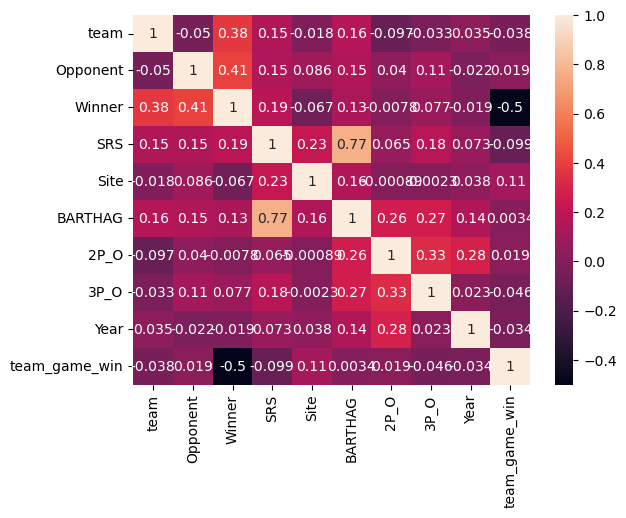

In [65]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

Extract any features that have high correlation. 

TRAINING DATA will be set to entire 2016 season and testing data will be set to 2017 NCAA tournament games

In [66]:
training_set = converted_season.loc[converted_season["Year"] == 2016] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == 2017) & (converted_season["Type"] == "REG")] # testing set

testing_set

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,team_game_win
115,68,35,68,13.22,0,0.9615,51.0,35.5,2017,REG,2.0
116,44,84,84,14.63,2,0.9472,53.6,40.4,2017,REG,1.0
117,44,86,86,20.51,1,0.9472,53.6,40.4,2017,REG,1.0
118,44,237,44,24.45,1,0.9472,53.6,40.4,2017,REG,2.0
119,47,69,47,11.13,1,0.9517,52.9,35.3,2017,REG,2.0
...,...,...,...,...,...,...,...,...,...,...,...
209,101,120,120,-20.54,0,0.3437,50.0,29.6,2017,REG,1.0
210,101,3,101,-12.33,1,0.3437,50.0,29.6,2017,REG,2.0
211,83,185,185,12.10,0,0.8278,49.1,37.1,2017,REG,1.0
213,40,168,168,-9.86,0,0.5879,49.3,39.7,2017,REG,1.0


In [67]:
training_set = training_set.drop(["Year", "Type"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



115
91


array([[  1.    , 183.    ,   1.    ,  -4.67  ,   2.    ,   0.9022,
         52.2   ,  38.1   ],
       [  1.    , 191.    , 191.    ,  13.52  ,   0.    ,   0.9022,
         52.2   ,  38.1   ],
       [  1.    , 155.    , 155.    ,  18.05  ,   2.    ,   0.9022,
         52.2   ,  38.1   ],
       [  6.    , 192.    ,   6.    , -10.78  ,   1.    ,   0.3501,
         51.    ,  34.7   ],
       [  6.    ,  54.    ,  54.    ,  -8.35  ,   1.    ,   0.3501,
         51.    ,  34.7   ]])

In [68]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

#Y_train

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [70]:
kernels = ["linear", "rbf", "poly"]


In [71]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

svm_clf=SVC(gamma="auto", kernel="linear")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Precision: ")
print(precision_score(Y_test, Y_pred))
print("Recall: ")
print(recall_score(Y_test, Y_pred))
print("F1 Score: ")
print(f1_score(Y_test, Y_pred))
print("Accuracy:")
print(accuracy_score(Y_test, Y_pred))

Precision: 
1.0
Recall: 
0.36363636363636365
F1 Score: 
0.5333333333333333
Accuracy:
0.7692307692307693


/Users/ktian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
svm_clf=SVC(gamma="auto", kernel="rbf")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Precision: ")
print(precision_score(Y_test, Y_pred))
print("Recall: ")
print(recall_score(Y_test, Y_pred))
print("F1 Score: ")
print(f1_score(Y_test, Y_pred))
print("Accuracy:")
print(accuracy_score(Y_test, Y_pred))

Precision: 
1.0
Recall: 
0.30303030303030304
F1 Score: 
0.4651162790697675
Accuracy:
0.7472527472527473


/Users/ktian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
svm_clf=SVC(gamma="auto", kernel="poly")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Precision: ")
print(precision_score(Y_test, Y_pred))
print("Recall: ")
print(recall_score(Y_test, Y_pred))
print("F1 Score: ")
print(f1_score(Y_test, Y_pred))
print("Accuracy:")
print(accuracy_score(Y_test, Y_pred))

Precision: 
1.0
Recall: 
0.15151515151515152
F1 Score: 
0.2631578947368421
Accuracy:
0.6923076923076923


/Users/ktian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
# Y_pred=svm_clf.predict(X_test)
# print("Acurracy of our model is :")
# accuracy_score(Y_test,Y_pred)